In [1]:
from SunImports import *
%load_ext autoreload
%autoreload 2

Optimal Parameters of Normaldistribution
----------------------------------------
tmax  = 2.42e+03 ± 15.6 s
sigma = 0.0725 ± 0.00161



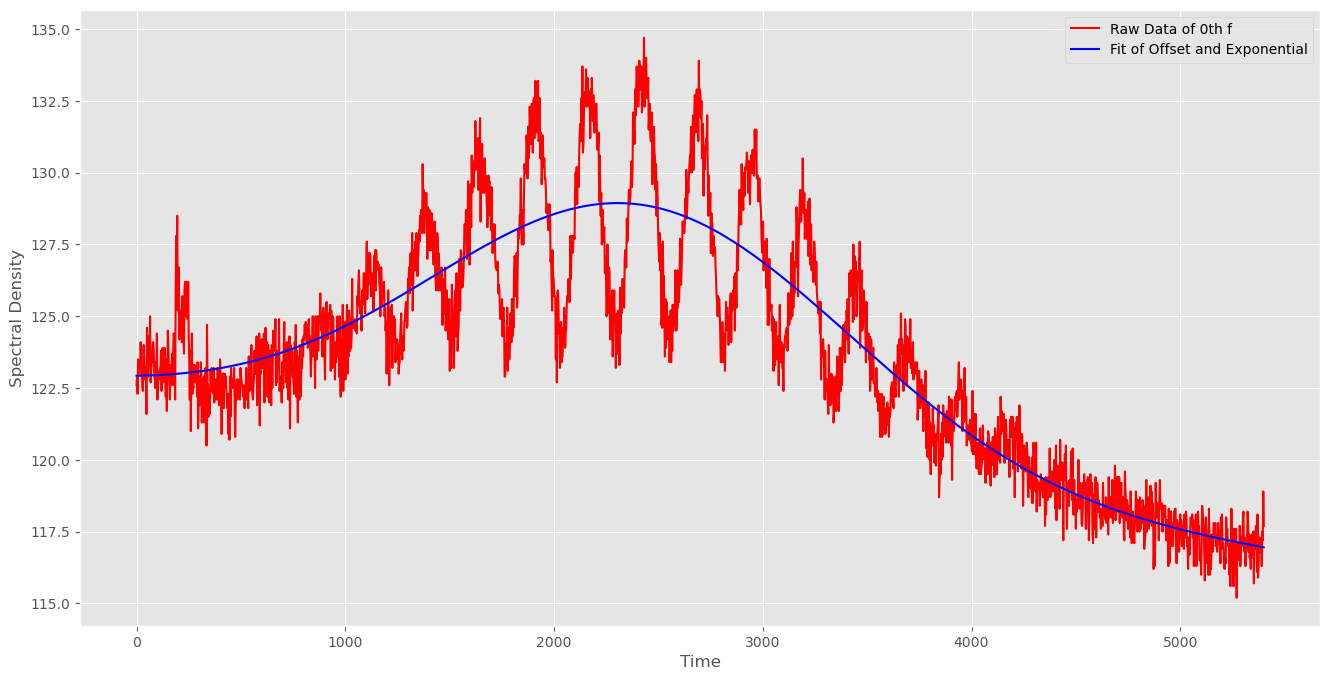

Optimal Value of Beff
----------------------------------------
Beff  = 5.83 ± 0.0447 m



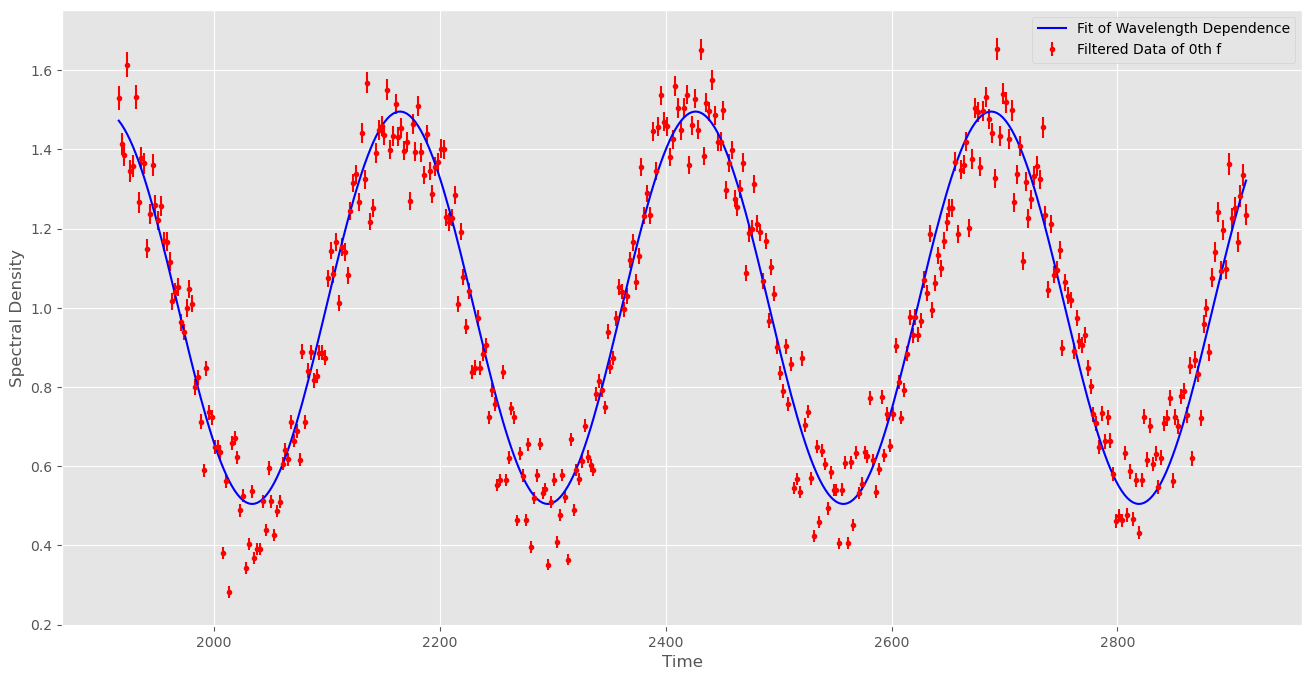

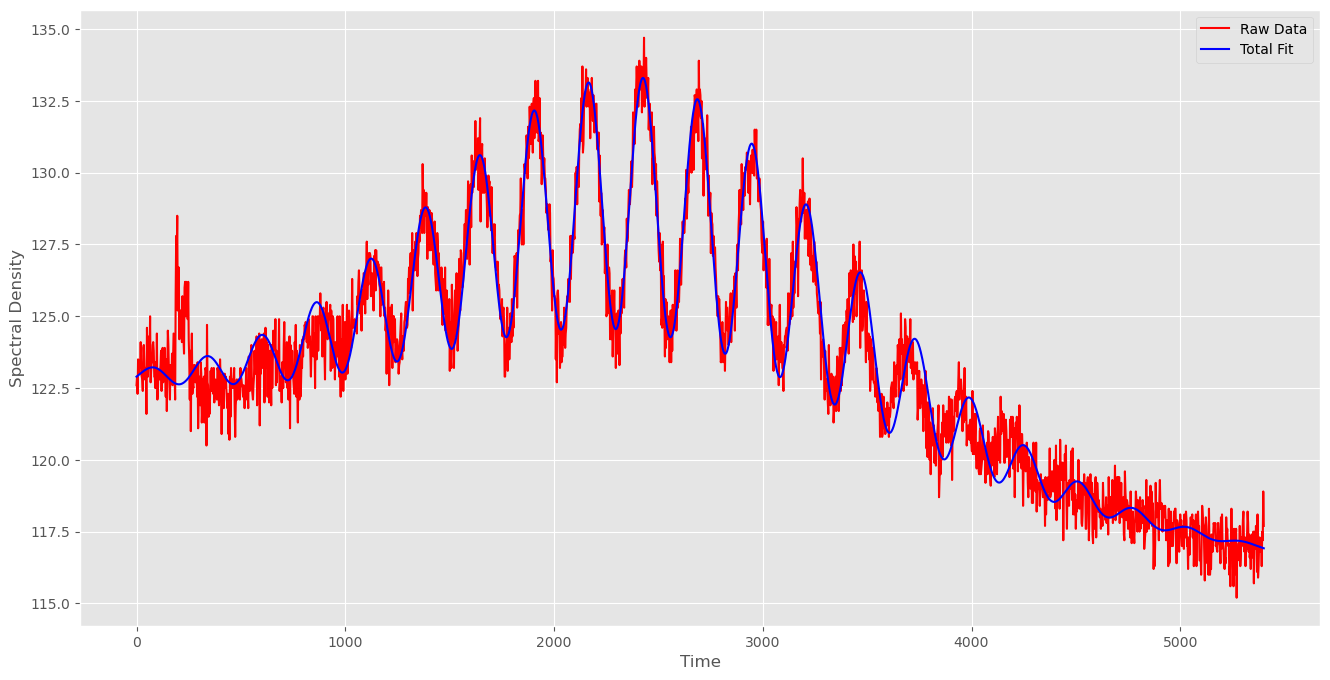

alpha = 0.011696±0.000018 rad


In [2]:
files = ['Zweite Daten Sonne 10/ETH_20240110_111502_01.fit', 
         'Zweite Daten Sonne 10/ETH_20240110_113002_01.fit',
         'Zweite Daten Sonne 10/ETH_20240110_114502_01.fit',
         'Zweite Daten Sonne 10/ETH_20240110_120002_01.fit',
         'Zweite Daten Sonne 10/ETH_20240110_121502_01.fit',
         'Zweite Daten Sonne 10/ETH_20240110_123003_01.fit']
data, t, freq = glue_together(files, 10)
#plt.imshow(data, aspect='auto', extent=[t[0],t[-1],freq[-1],freq[0]])

# First Fit : Filter; p0 = (S0, tmax, sigma, a, b)
p0 = (100, 2500, 0.065, 0.1, 145.0)
data_filtered, data_filtered_error, params_tot, cov_tot, tmax_opt, sigma_opt, params_opt1, fmin = data_filter(data, t, (0, 80), p0)

# Second Fit: Signal; p0 = (V0, Beff, phi)
p0 = (0.6, 5, 0.0)
V01, V0_uncert1, Bl1, Bl_sig1, params_opt2 = data_fitter(data_filtered, data_filtered_error, t, freq, (0, 80), tmax_opt, sigma_opt, p0, fmin)

# Nice Plot
nice_plot(data, t, freq, params_opt1, params_opt2, fmin)

# Determine Diameter; p = alpha
p = np.deg2rad(0.5)
alpha1 = sun_diameter(V01, V0_uncert1, Bl1, Bl_sig1, p)

Optimal Parameters of Normaldistribution
----------------------------------------
tmax  = 2.06e+03 ± 21.4 s
sigma = 0.0804 ± 0.00273



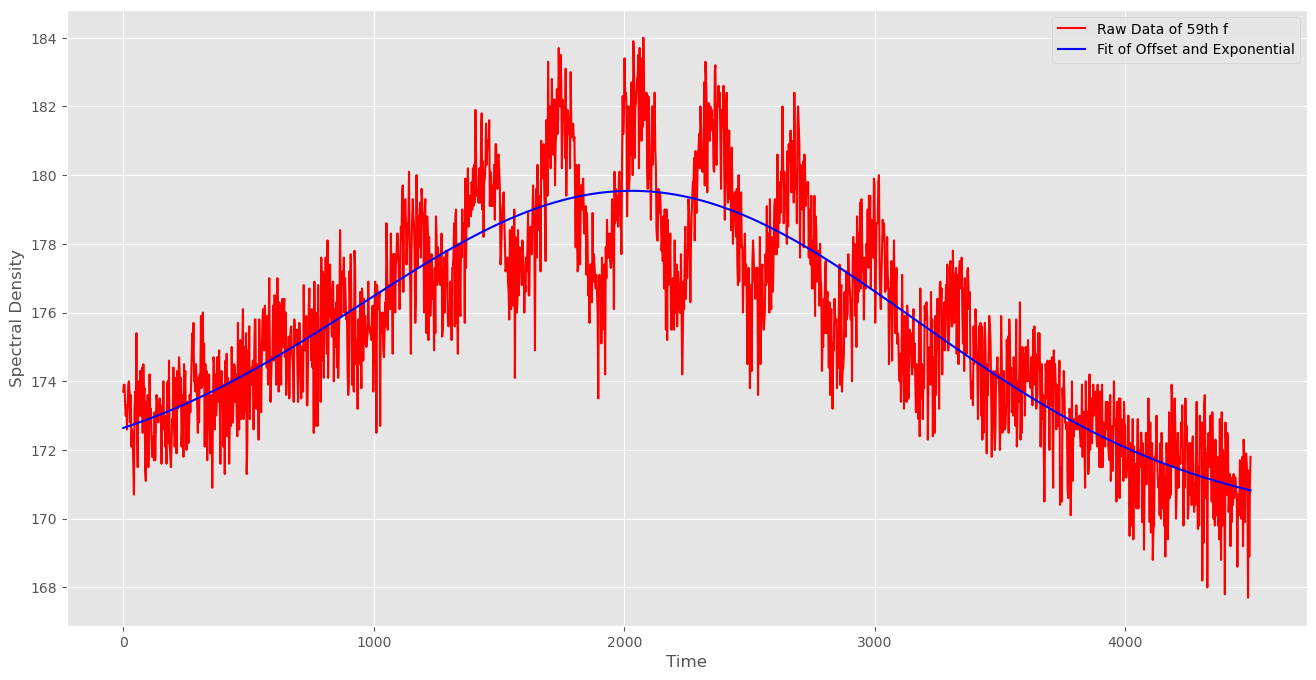

Optimal Value of Beff
----------------------------------------
Beff  = 5.08 ± 0.0585 m



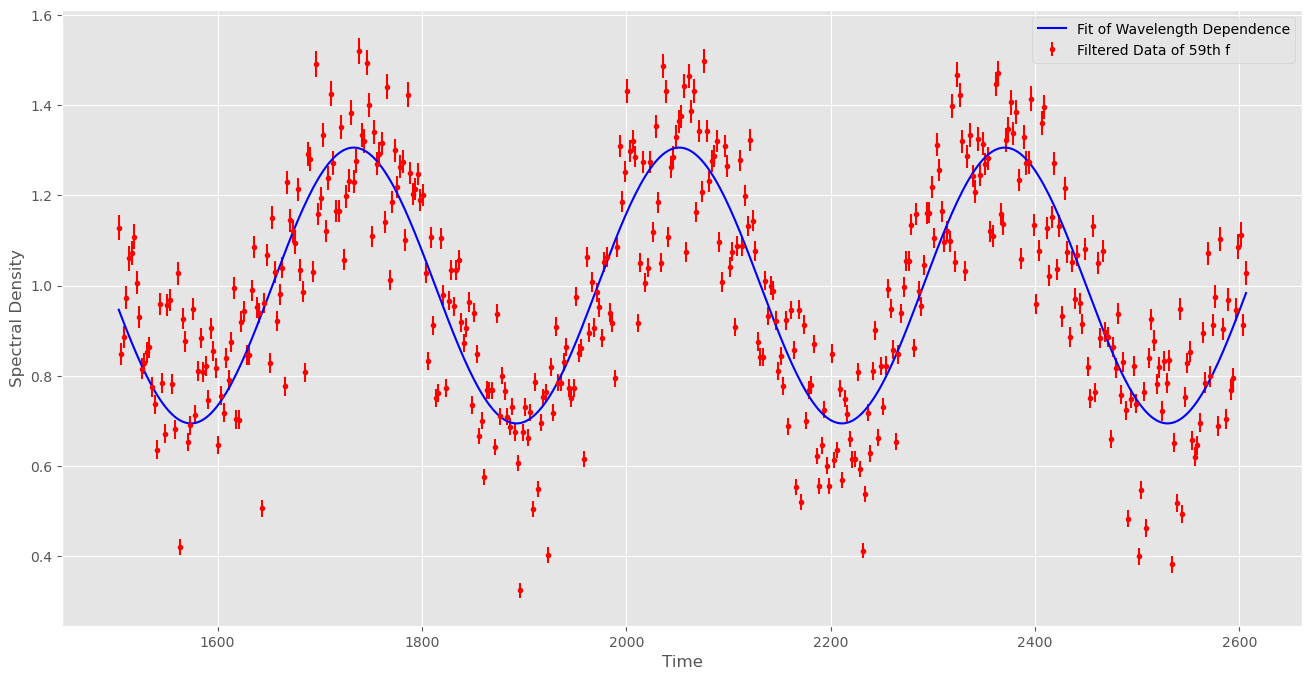

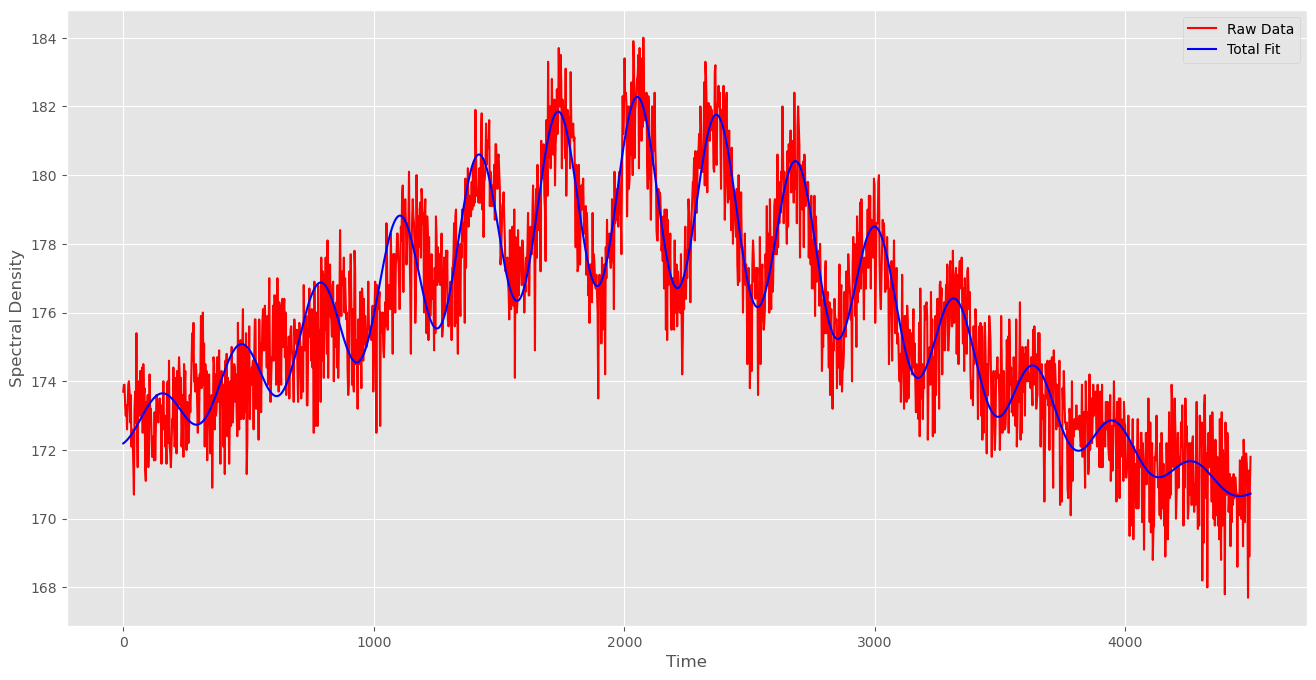

alpha = 0.01627±0.00007 rad


In [3]:
files = ['Dritte Daten Sonne 10/ETH_20240110_140003_01.fit', 
         'Dritte Daten Sonne 10/ETH_20240110_141503_01.fit',
         'Dritte Daten Sonne 10/ETH_20240110_143004_01.fit',
         'Dritte Daten Sonne 10/ETH_20240110_144504_01.fit',
         'Dritte Daten Sonne 10/ETH_20240110_150004_01.fit']
data, t, freq = glue_together(files, 10)

# First Fit : Filter; p0 = (S0, tmax, sigma, a, b)
p0 = (100, 2500, 0.08, 0.1, 145.0)
data_filtered, data_filtered_error, params_tot, cov_tot, tmax_opt, sigma_opt, params_opt1, fmin = data_filter(data, t, (0, 80), p0)

# Second Fit: Signal; p0 = (V0, Beff, phi)
p0 = (0.6, 5, 0.0)
V02, V0_uncert2, Bl2, Bl_sig2, params_opt2 = data_fitter(data_filtered, data_filtered_error, t, freq, (0, 80), tmax_opt, sigma_opt, p0, fmin)

# Nice Plot
nice_plot(data, t, freq, params_opt1, params_opt2, fmin)

# Determine Diameter; p = alpha
p = np.deg2rad(0.5)
alpha2 = sun_diameter(V02, V0_uncert2, Bl2, Bl_sig2, p)

Optimal Parameters of Normaldistribution
----------------------------------------
tmax  = 1.65e+03 ± 44.3 s
sigma = 0.0765 ± 0.00655



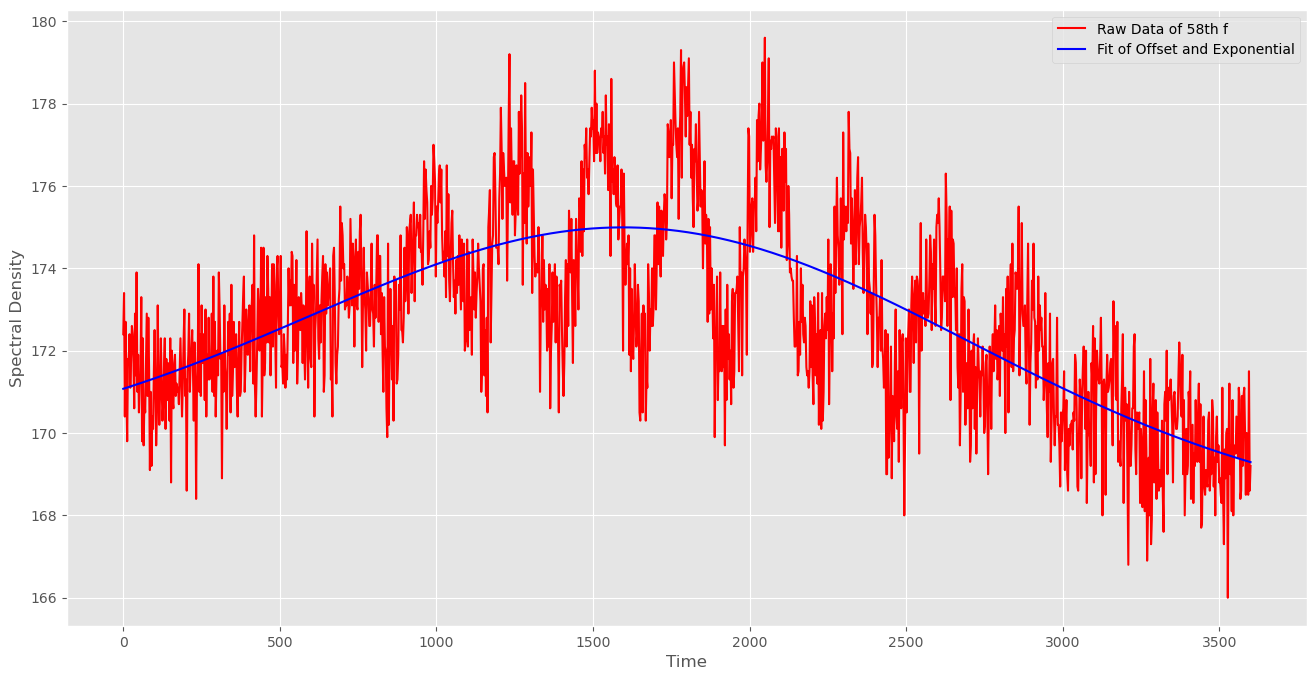

Optimal Value of Beff
----------------------------------------
Beff  = 5.89 ± 0.0735 m



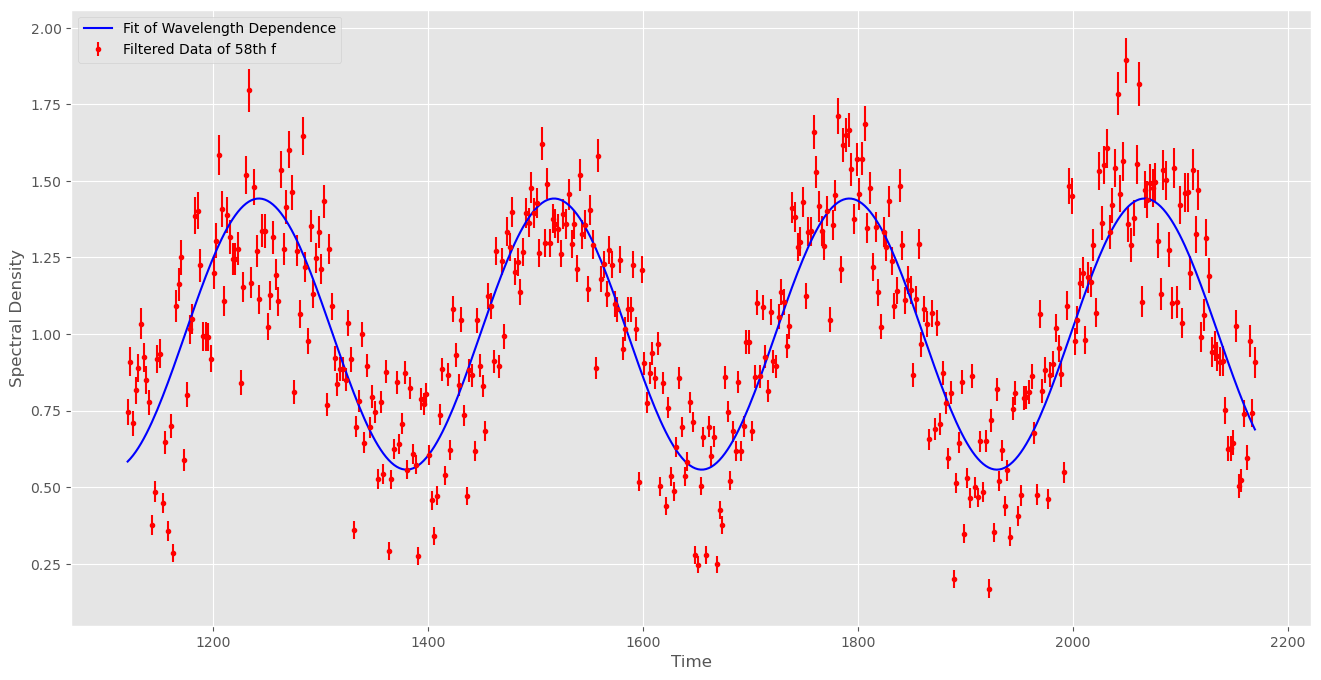

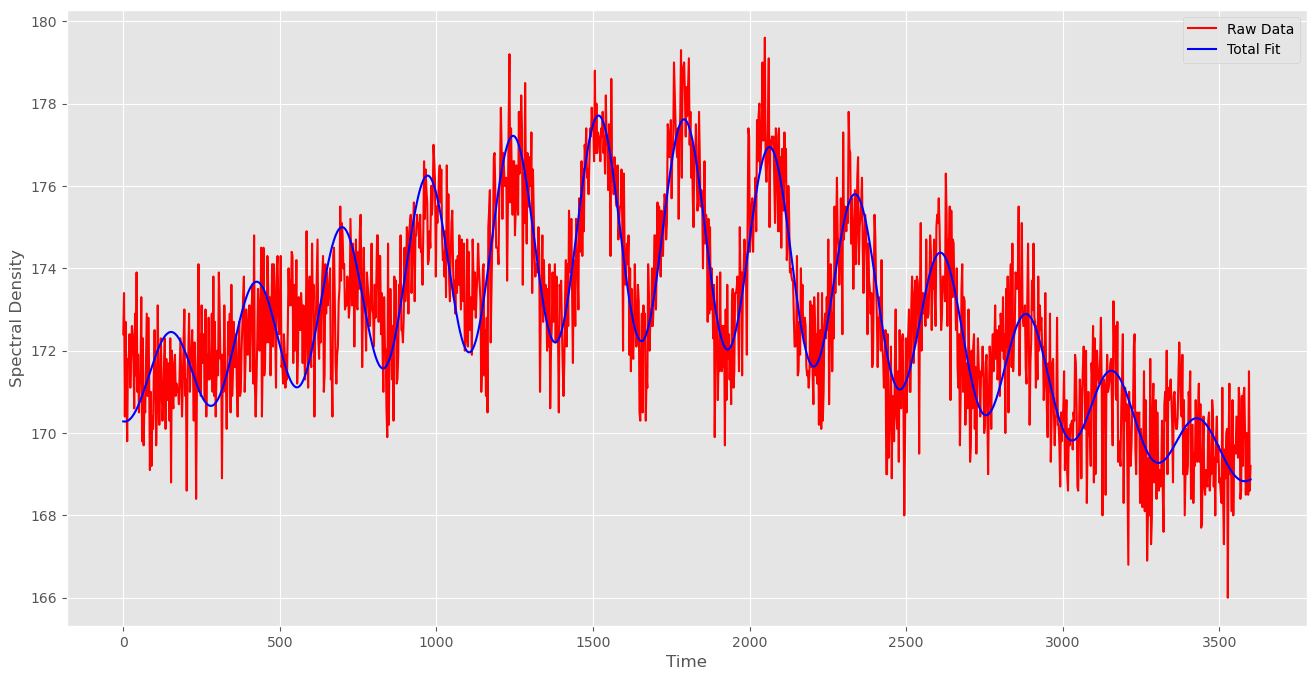

alpha = 0.012427±0.000035 rad


In [4]:
files = ['Daten Sonne 11 2/ETH_20240111_121919_01.fit', 
         'Daten Sonne 11 2/ETH_20240111_123419_01.fit',
         'Daten Sonne 11 2/ETH_20240111_124919_01.fit',
         'Daten Sonne 11 2/ETH_20240111_130419_01.fit']
data, t, freq = glue_together(files, 10)
#plt.imshow(data, aspect='auto', extent=[t[0],t[-1],freq[-1],freq[0]])
#plt.plot(t, data[50, :])

# First Fit : Filter; p0 = (S0, tmax, sigma, a, b)
p0 = (8.9, 1700, 0.07, 0.0, 122.0)
data_filtered, data_filtered_error, params_tot, cov_tot, tmax_opt, sigma_opt, params_opt1, fmin = data_filter(data, t, (0, 80), p0)

# Second Fit: Signal; p0 = (V0, Beff, phi)
p0 = (0.6, 5, 0.0)
V04, V0_uncert4, Bl4, Bl_sig4, params_opt2 = data_fitter(data_filtered, data_filtered_error, t, freq, (0, 80), tmax_opt, sigma_opt, p0, fmin)

# Nice Plot
nice_plot(data, t, freq, params_opt1, params_opt2, fmin)

# Determine Diameter; p = alpha
p = np.deg2rad(0.5)
alpha4 = sun_diameter(V04, V0_uncert4, Bl4, Bl_sig4, p)

[7.81195158e+00 1.83689315e+03 6.87770029e-02 6.99589572e-05
 1.69569018e+02]
Optimal Parameters of Normaldistribution
----------------------------------------
tmax  = 1.84e+03 ± 24.1 s
sigma = 0.0688 ± 0.0034



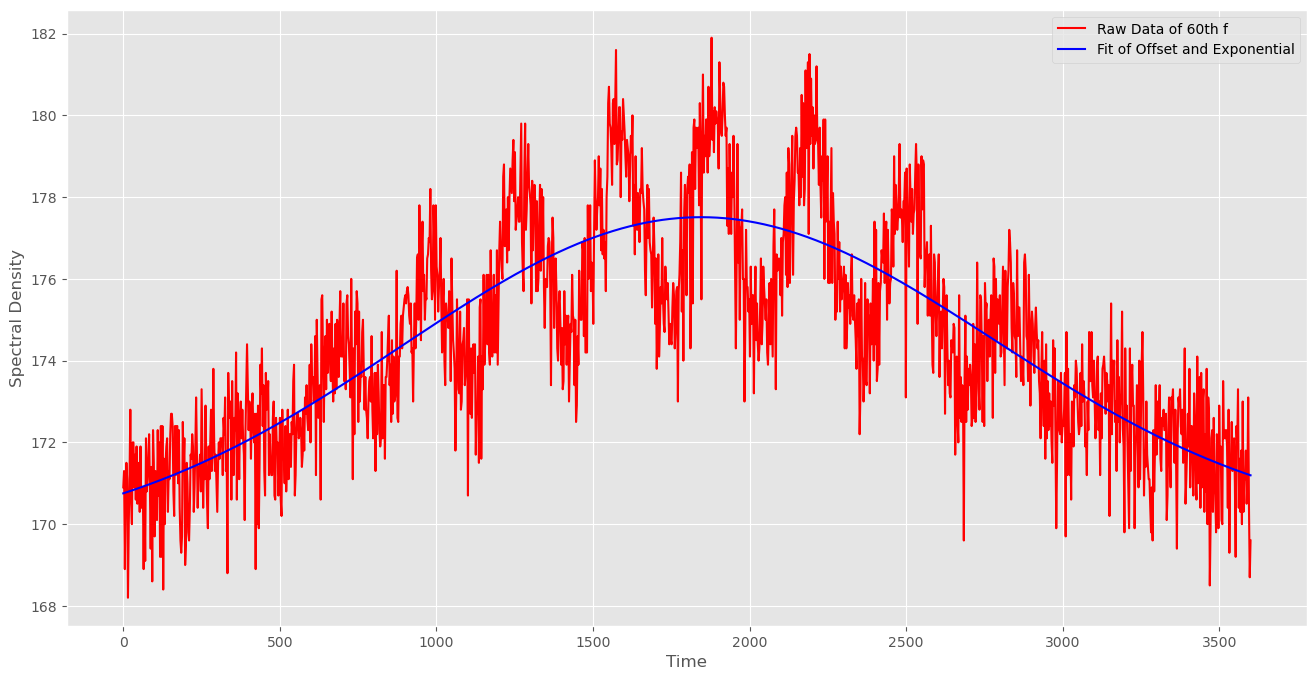

Optimal Value of Beff
----------------------------------------
Beff  = 5.23 ± 0.0843 m



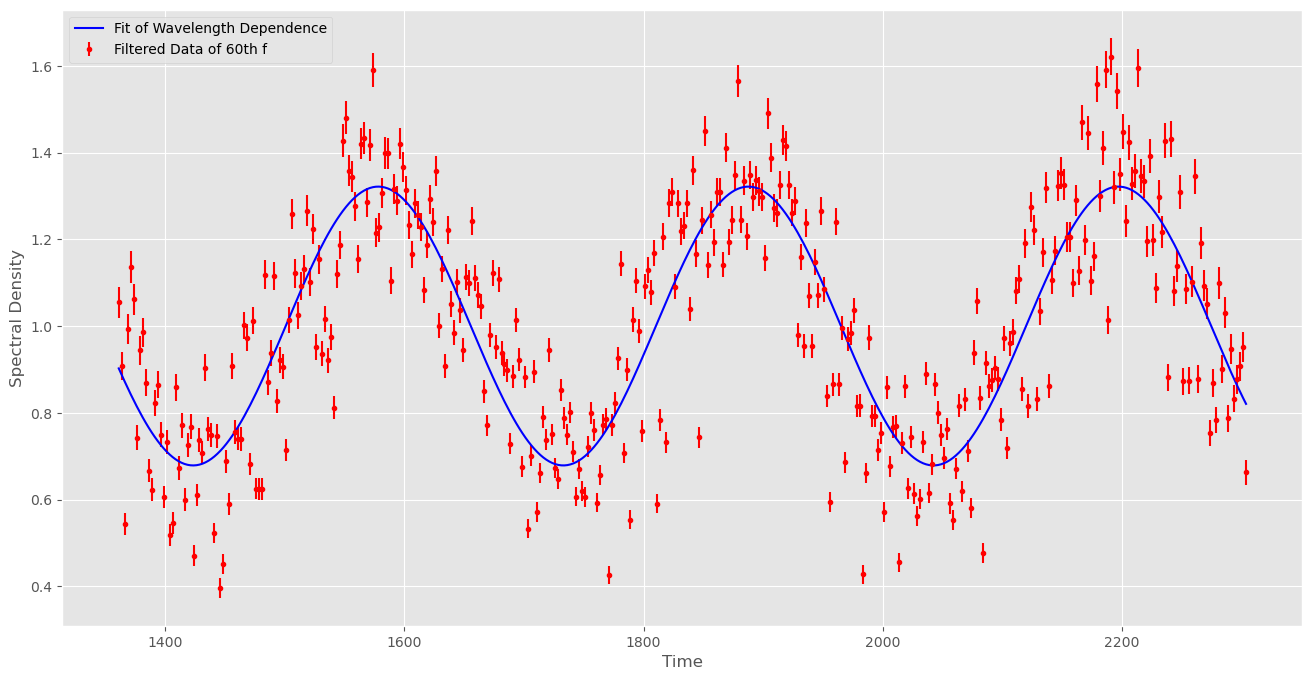

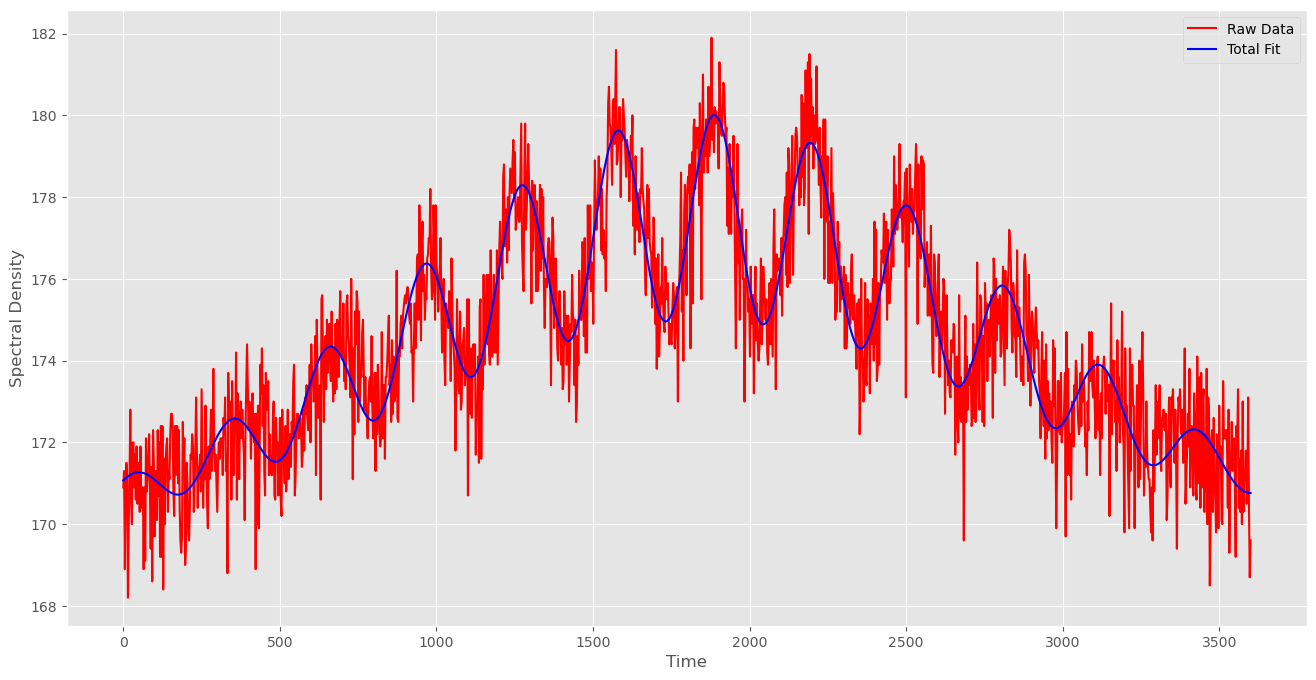

alpha = 0.01567±0.00009 rad


In [74]:
files = ['Daten Sonne 11 3/ETH_20240111_135831_01.fit', 
         'Daten Sonne 11 3/ETH_20240111_141331_01.fit',
         'Daten Sonne 11 3/ETH_20240111_142832_01.fit',
         'Daten Sonne 11 3/ETH_20240111_144332_01.fit']
data, t, freq = glue_together(files, 10)

# First Fit : Filter; p0 = (S0, tmax, sigma, a, b)
p0 = (100, 1600, 0.08, 0.0, 150.0)
data_filtered, data_filtered_error, params_tot, cov_tot, tmax_opt, sigma_opt, params_opt1, fmin = data_filter(data, t, (0, 80), p0)

# Second Fit: Signal; p0 = (V0, Beff, phi)
p0 = (0.6, 6.4, 0.0)
V05, V0_uncert5, Bl5, Bl_sig5, params_opt2 = data_fitter(data_filtered, data_filtered_error, t, freq, (0, 80), tmax_opt, sigma_opt, p0, fmin)

# Nice Plot
nice_plot(data, t, freq, params_opt1, params_opt2, fmin)

# Determine Diameter; p = alpha
p = np.deg2rad(0.5)
alpha5 = sun_diameter(V05, V0_uncert5, Bl5, Bl_sig5, p)

In [163]:
files = ['Daten Sonne 12/ETH_20240112_083005_01.fit',
         'Daten Sonne 12/ETH_20240112_084505_01.fit', 
         'Daten Sonne 12/ETH_20240112_090000_01.fit',
         'Daten Sonne 12/ETH_20240112_091500_01.fit',
         'Daten Sonne 12/ETH_20240112_093000_01.fit']
data, t, freq = glue_together(files, 10)
data[:, 717] = data[:, 716]
data[:, 718] = data[:, 716]
data[:, 719] = data[:, 720]
#plt.imshow(data[:, 700:800], aspect='auto')
data = data[:, 400:]
t = t[400:]

# Model
def normal(t, tmax, sigma) :
    # sigma = 0.065
    return np.exp(- omega**2 * (t - tmax)**2 / (2 * sigma**2) )
N = lambda t, a, b : a*t + b
def model(t, S0, tmax, sigma, a, b, V0, Beff, phi, lamda) :
    return S0 * ( 1 + V0 * np.cos(2 * np.pi * Beff * omega * t / lamda + phi) ) * normal(t, tmax, sigma) + N(t, a, b)
def sinc(Bl, alpha) :
    return np.sin(np.pi * Bl * alpha) / (np.pi * Bl * alpha)

# Fit : Filter; p0 = (S0, tmax, sigma, a, b, V0, Beff, phi)
p0 = (4.5, 2000, 0.07, 0.0, 100.0, 0.6, 4.0, 0.0)
V06, V0_uncert6 = np.zeros(70, dtype=float), np.zeros(70, dtype=float)
Bl6, Bl_sig6 = np.zeros(70, dtype=float), np.zeros(70, dtype=float)
for f in range( 70 ) :
    l = c/freq[f]
    model_fit = lambda t, S0, tmax, sigma, a, b, V0, Beff, phi : model(t, S0, tmax, sigma, a, b, V0, Beff, phi, l)
    params, cov = curve_fit(model_fit, t, data[f, :], p0, maxfev=10000)
    V06[f], V0_uncert6[f] = params[5], np.sqrt(cov[5, 5])
    if V0_uncert6[f] > 10 :
        V0_uncert6[f] = 0.6
    Bl6[f], Bl_sig6[f] = params[6]/l, np.sqrt(cov[6, 6])/l
    if Bl_sig6[f] > 10 :
        Bl_sig6[f] = 0.6

# Determine Diameter; p = alpha
p = np.deg2rad(0.5)
alpha6 = sun_diameter(V06, V0_uncert6, Bl6, Bl_sig6, p)

alpha = 0.01703±0.00018 rad


Optimal Parameters of Normaldistribution
----------------------------------------
tmax  = 1.61e+03 ± 77.7 s
sigma = 0.0914 ± 0.0129

[ 4.65999591e+00 -2.17923931e-03  1.66461226e+02]


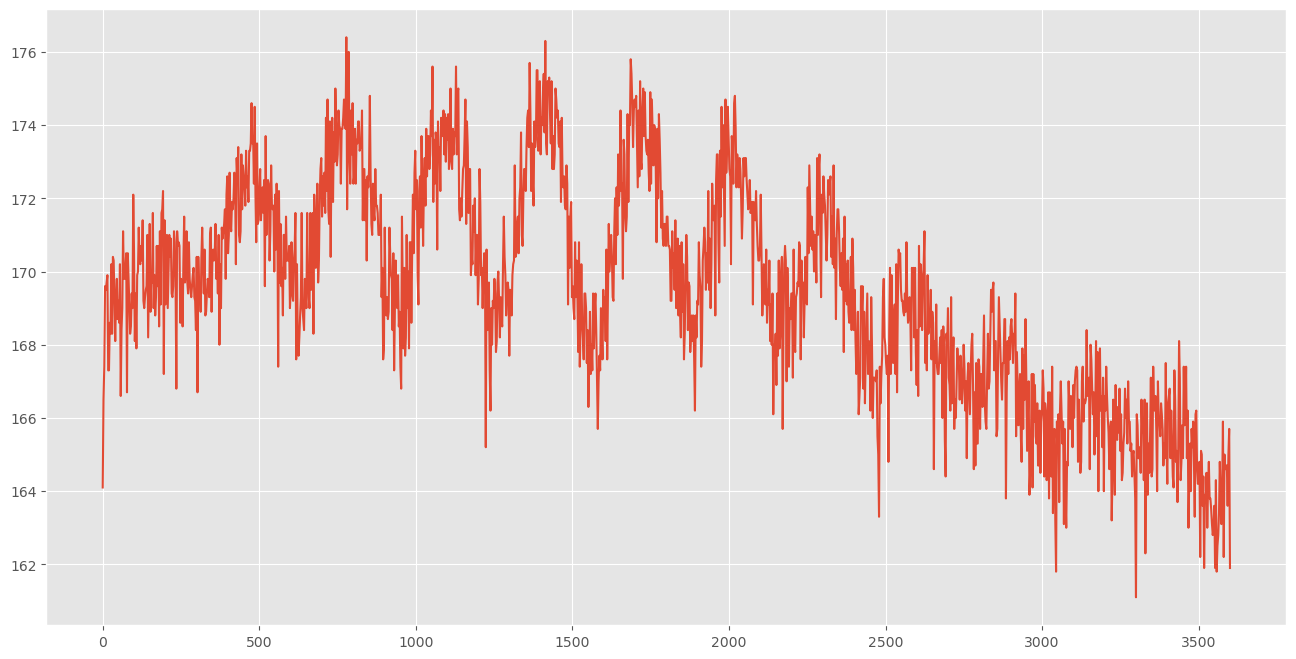

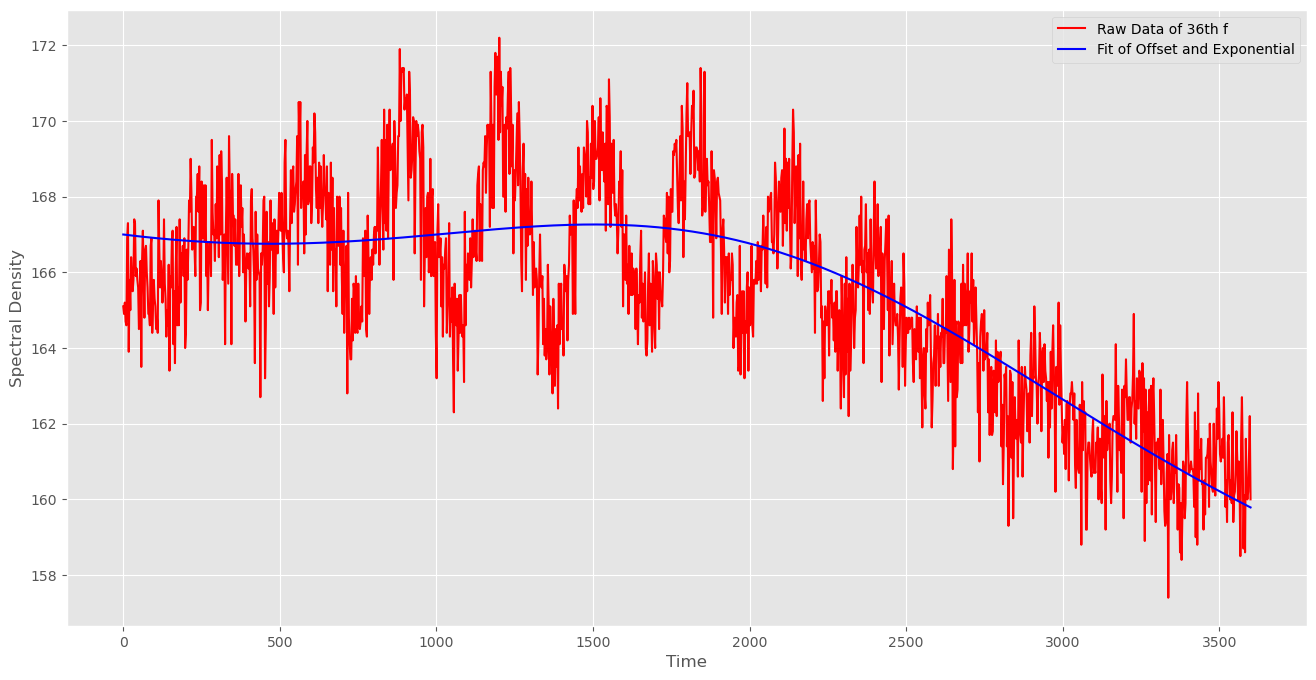

Optimal Value of Beff
----------------------------------------
Beff  = 5.28 ± 0.183 m



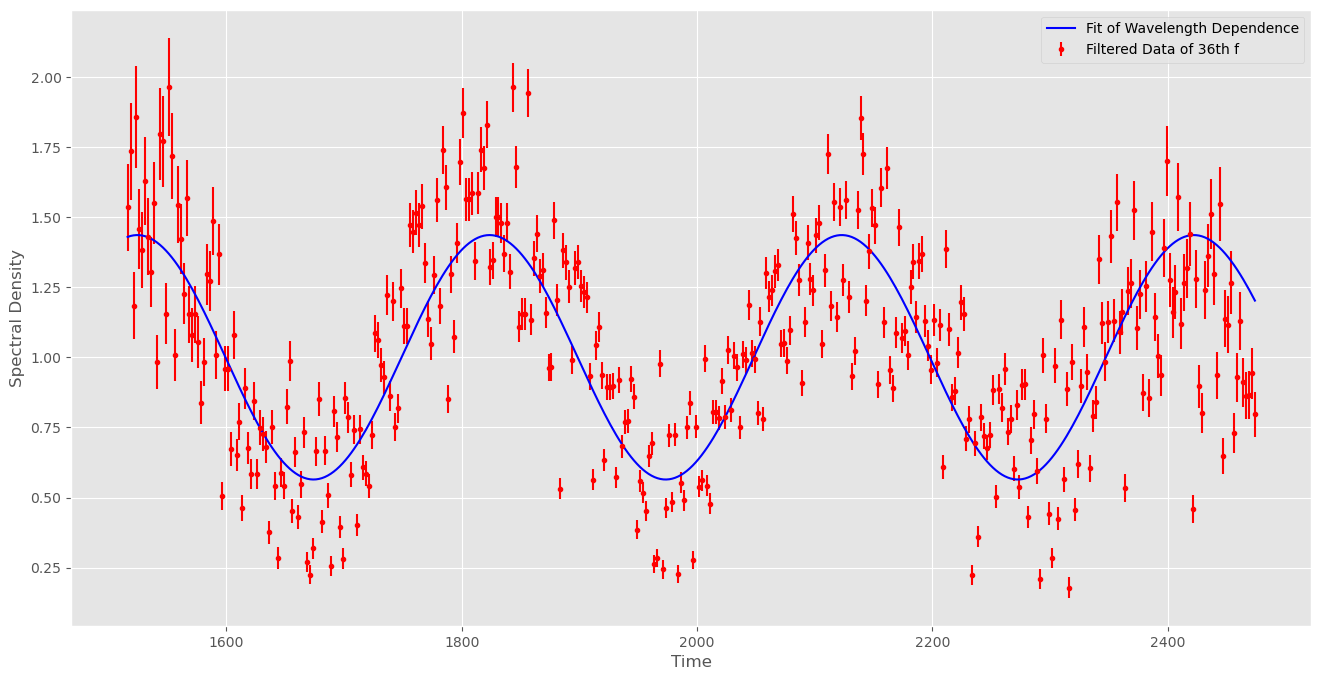

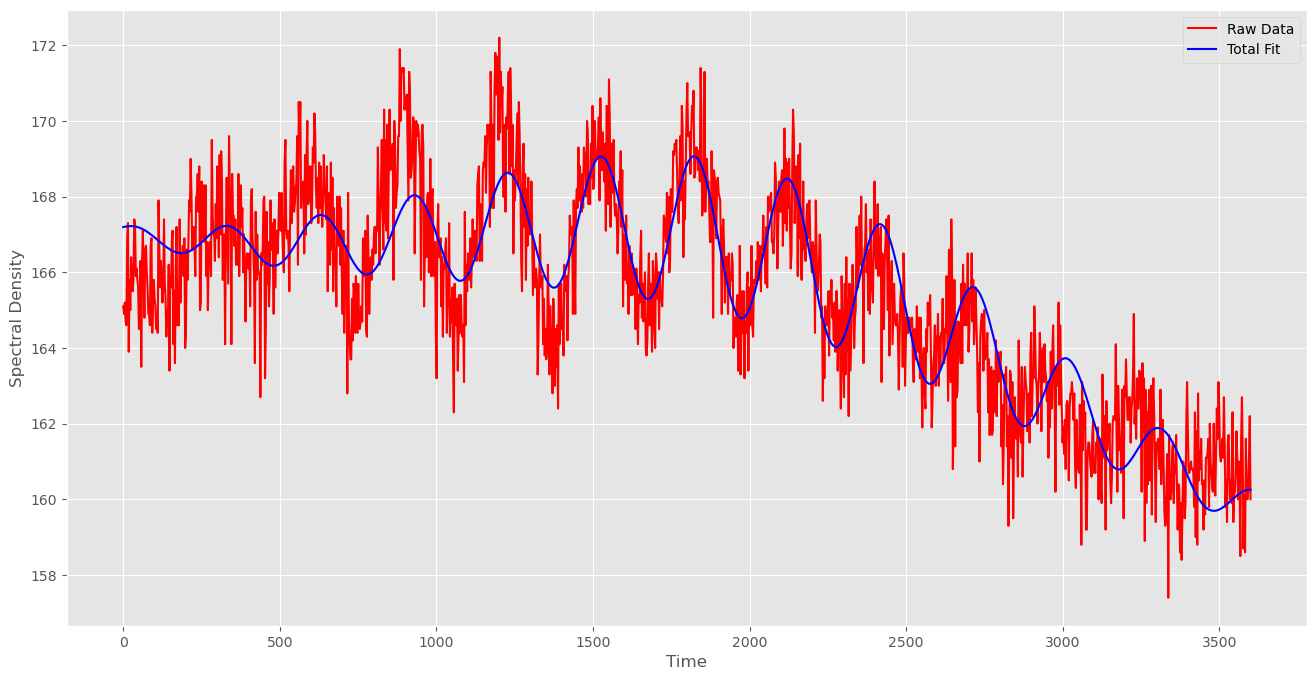

alpha = 0.0111±0.0008 rad


In [171]:
files = ['Daten Sonne 12 2/ETH_20240112_100001_01.fit', 
         'Daten Sonne 12 2/ETH_20240112_101501_01.fit',
         'Daten Sonne 12 2/ETH_20240112_103001_01.fit',
         'Daten Sonne 12 2/ETH_20240112_104501_01.fit']
data, t, freq = glue_together(files, 10)

# First Fit : Filter; p0 = (S0, tmax, sigma, a, b)
p0 = (10, 1400, 0.08, -0.1, 160.0)
data_filtered, data_filtered_error, params_tot, cov_tot, tmax_opt, sigma_opt, params_opt1, fmin = data_filter(data, t, (0, 80), p0)

# Second Fit: Signal; p0 = (V0, Beff, phi)
p0 = (0.6, 6.4, 0.0)
V07, V0_uncert7, Bl7, Bl_sig7, params_opt2 = data_fitter(data_filtered, data_filtered_error, t, freq, (0, 80), tmax_opt, sigma_opt, p0, fmin)

# Nice Plot
nice_plot(data, t, freq, params_opt1, params_opt2, fmin)

# Determine Diameter; p = alpha
p = np.deg2rad(0.5)
alpha7 = sun_diameter(V07, V0_uncert7, Bl7, Bl_sig7, p)

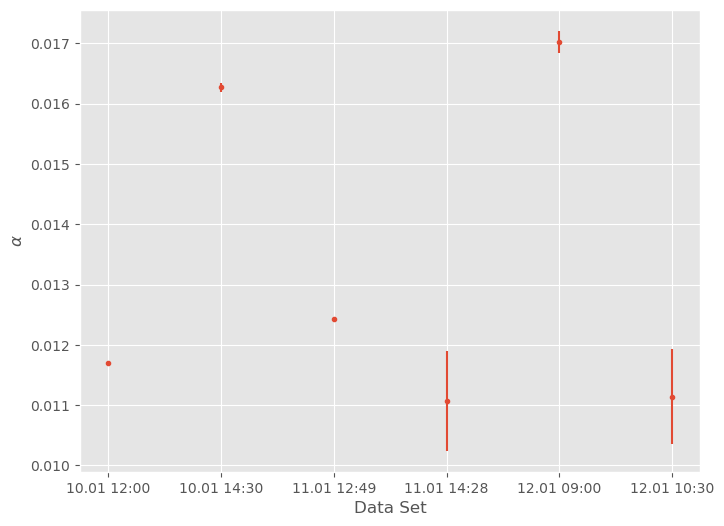

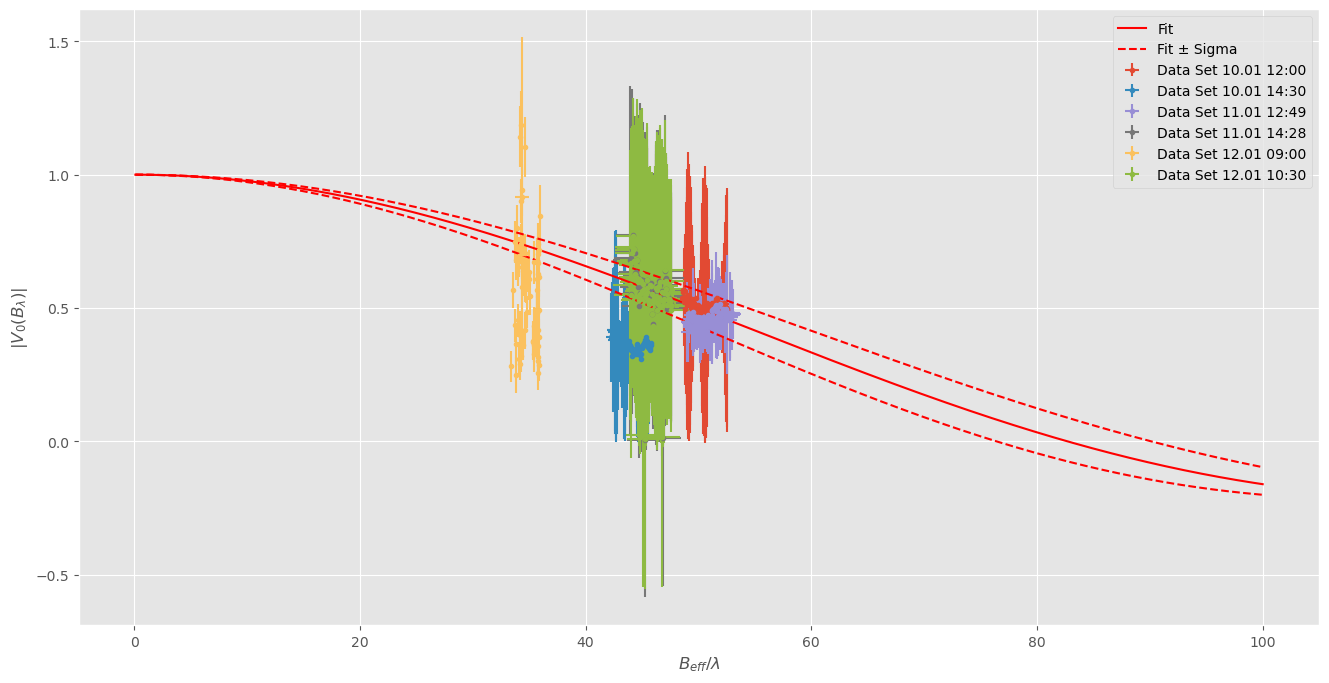

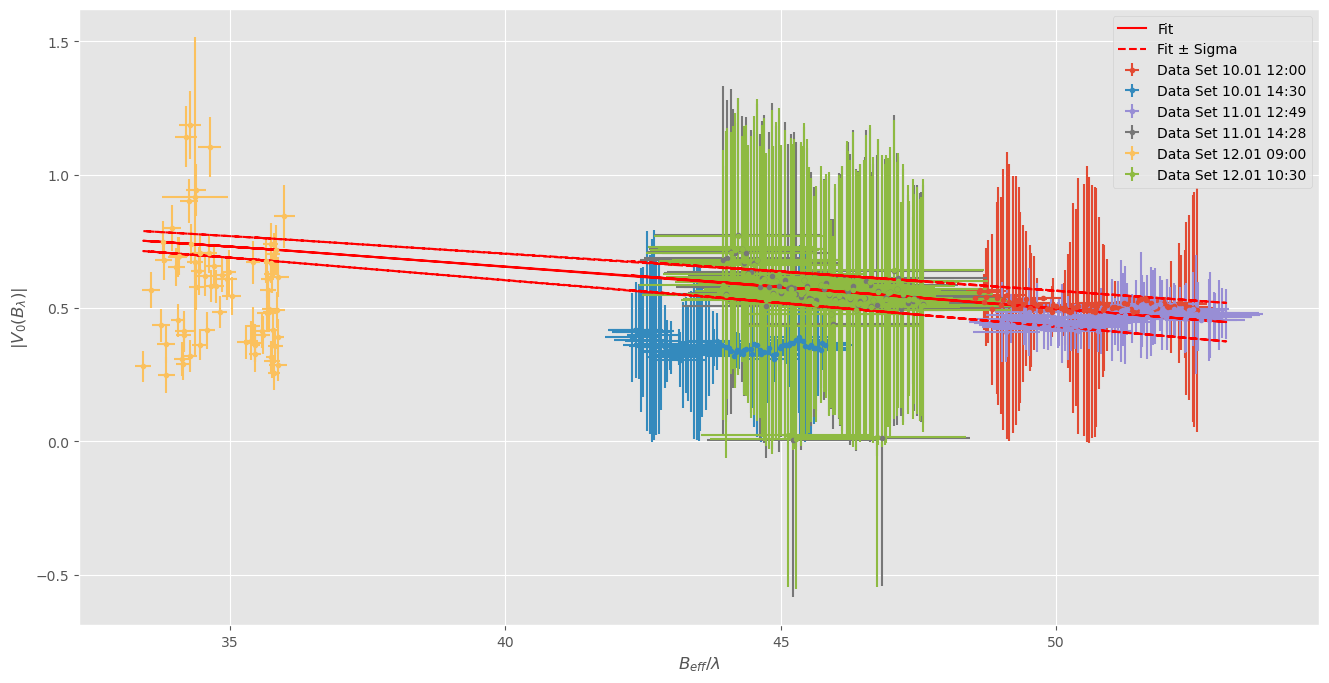

Alpha Commuted as Weigthed Sum of Fits of Indivdual Data Sets
-------------------------------------------------------------
d = (1.81±0.15)×10⁹ m
d_exakt = 1670983200.0 m
R/R0 = 1.30±0.11
alpha = 0.0121±0.0010 rad
Number of Datapoints = 470


In [174]:
# Final Fit
p = np.deg2rad(0.5)
sun_diameter_final((V01, V02, V04, V05, V06, V07), (V0_uncert1, V0_uncert2, V0_uncert4, V0_uncert5, V0_uncert6, V0_uncert7), 
                   (Bl1, Bl2, Bl4, Bl5, Bl6, Bl7), (Bl_sig1, Bl_sig2, Bl_sig4, Bl_sig5, Bl_sig6, Bl_sig7), 
                   ("10.01 12:00", "10.01 14:30", "11.01 12:49", "11.01 14:28", "12.01 09:00", "12.01 10:30"), 
                   (alpha1, alpha2, alpha4, alpha5, alpha6, alpha7), p)